In [187]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

# To use KNeighbours Classifier to classify the Purchased column appropriately

In [189]:
df = pd.read_csv('Social_Network_Ads.csv')

In [190]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [191]:
# MetaData
print('Metadata',df.describe())
print('Shape of dataset',df.shape)

Metadata             User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000
Shape of dataset (400, 5)


In [192]:
x = df.iloc[:,1:4].values
y = df.iloc[:,4].values

In [193]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])

In [194]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [195]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.fit_transform(x_test)

# KNeighborsClassifer

In [196]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [197]:
y_test_pred = classifier.predict(x_test)

/Users/aryankamani/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [198]:
y_train_pred = classifier.predict(x_train)

/Users/aryankamani/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [199]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, y_test_pred)
actrain = accuracy_score(y_train,y_train_pred)
actest = accuracy_score(y_test,y_test_pred)
print('Training accuracy: ',actrain)
print('Testing accuracy: ',actest)

Training accuracy:  0.9125
Testing accuracy:  0.925


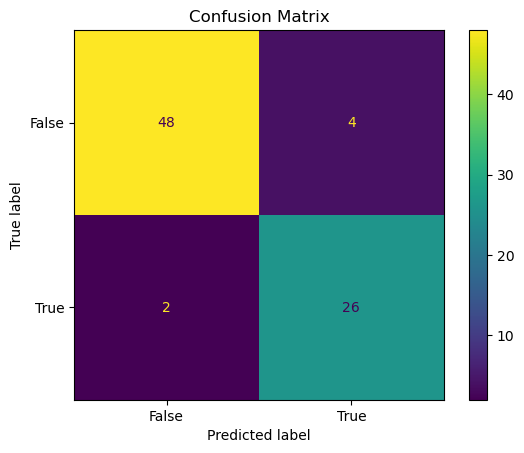

In [143]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

In [144]:
print('Train Accuracy of KNN Classifier Model is : ',actrain)
print('Test Accuracy of KNN Classifier Model is : ',actest)

Train Accuracy of KNN Classifier Model is :  0.9125
Test Accuracy of KNN Classifier Model is :  0.925


In [145]:
# KNN Regression
song = pd.read_csv('Song_data.csv')
song.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [146]:
song.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [147]:
print('Metadata: ',song.describe())

Metadata:         song_popularity  song_duration_ms  acousticness  danceability  \
count     18835.000000      1.883500e+04  18835.000000  18835.000000   
mean         52.991877      2.182116e+05      0.258539      0.633348   
std          21.905654      5.988754e+04      0.288719      0.156723   
min           0.000000      1.200000e+04      0.000001      0.000000   
25%          40.000000      1.843395e+05      0.024100      0.533000   
50%          56.000000      2.113060e+05      0.132000      0.645000   
75%          69.000000      2.428440e+05      0.424000      0.748000   
max         100.000000      1.799346e+06      0.996000      0.987000   

             energy  instrumentalness           key      liveness  \
count  18835.000000      18835.000000  18835.000000  18835.000000   
mean       0.644995          0.078008      5.289196      0.179650   
std        0.214101          0.221591      3.614595      0.143984   
min        0.001070          0.000000      0.000000      0.01090

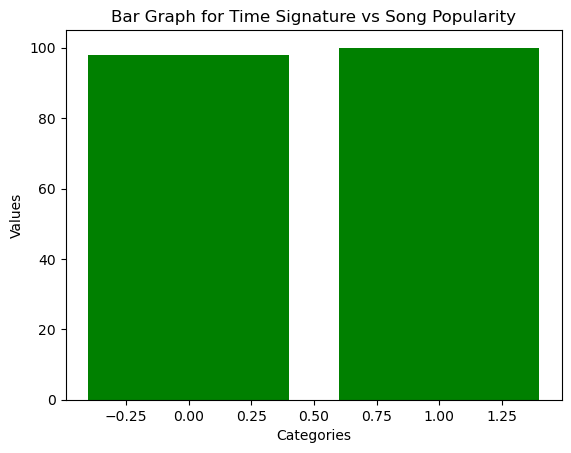

In [148]:
plt.bar(song['audio_mode'], song['song_popularity'], color = 'green')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Graph for Time Signature vs Song Popularity')

# Display the graph
plt.show()

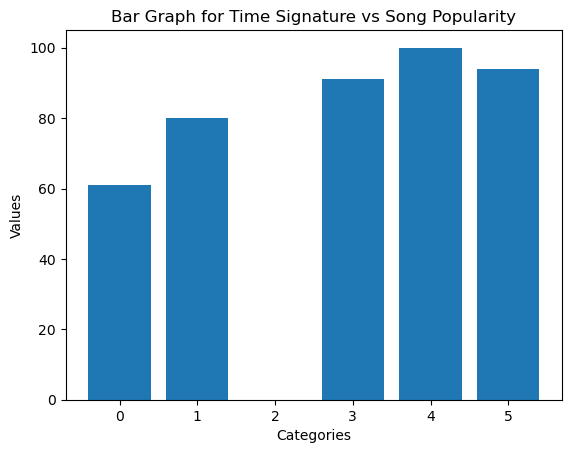

In [149]:
plt.bar(song['time_signature'], song['song_popularity'])

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Graph for Time Signature vs Song Popularity')

# Display the graph
plt.show()

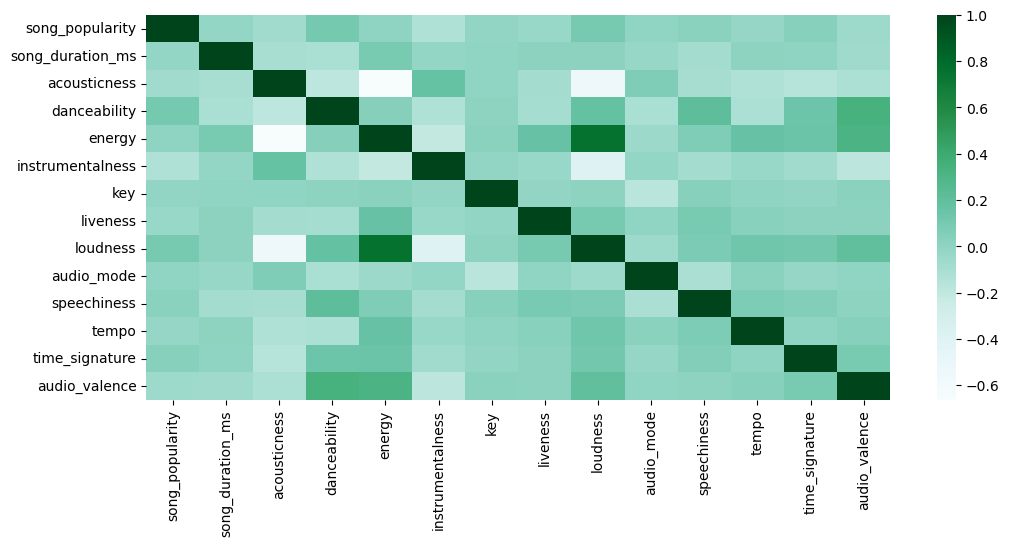

In [150]:
import seaborn as sns
corr = song.corr()
fig = plt.figure(figsize = (12,5))
r = sns.heatmap(corr,cmap ='BuGn')

In [151]:
new_song = song.drop(columns = ['energy','loudness'])

In [152]:
y = new_song['song_popularity'].values
x = new_song.iloc[:,2:].values

In [153]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 42)

In [154]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [155]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 

# KNeighborsRegressor

In [156]:
rmse_val = [] 
from sklearn.neighbors import KNeighborsRegressor
for i in range(1,10):
    model = KNeighborsRegressor(n_neighbors = i)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , i , 'is:', error)

RMSE value for k=  1 is: 24.63789576721313
RMSE value for k=  2 is: 22.197591408638722
RMSE value for k=  3 is: 21.656771730339752
RMSE value for k=  4 is: 21.199967332200956
RMSE value for k=  5 is: 21.01511434163755
RMSE value for k=  6 is: 21.026888233556683
RMSE value for k=  7 is: 20.973431778772657
RMSE value for k=  8 is: 20.9146457272955
RMSE value for k=  9 is: 20.92436606741322


<AxesSubplot:>

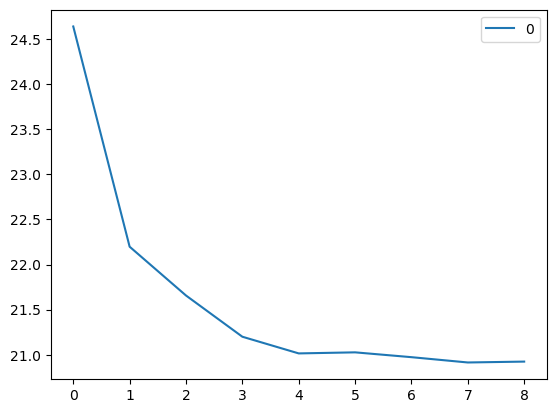

In [157]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

[-462.6208759  -454.87654976 -457.99691932 -474.18143265 -471.46677285]


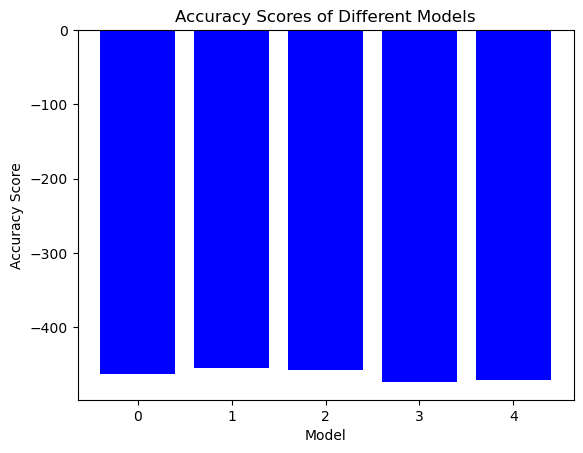

In [159]:
# Applying K-fold Cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)
print(scores)
plt.bar(range(len(scores)), scores, color='blue')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Models')


# Show the plot
plt.show()

In [160]:
knn_model = neighbors.KNeighborsRegressor(n_neighbors = 12)
knn_model.fit(x_train, y_train)
y_test_pred=knn_model.predict(x_test)

In [161]:
n = len(y_test)

In [162]:
MSE = (1/n)*np.sum((y_test_pred - y_test)**2)
print('Mean Square Error is : ',MSE)

Mean Square Error is :  435.58220517448854


In [163]:
RMSE = np.sqrt((1/n)*np.sum((y_test_pred - y_test)**2))
print('Root Mean Square Error is : ',RMSE)

Root Mean Square Error is :  20.870606248369704


In [164]:
performance = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': y_test_pred,
                            'Error': y_test - y_test_pred})
performance.head()

,True Value,Prediction,Error
0,44,36.833333,7.166667
1,50,52.000000,-2.000000
2,69,41.583333,27.416667
3,65,64.166667,0.833333
4,59,54.416667,4.583333


In [165]:
df1 = pd.read_csv('Social_Network_Ads.csv')

In [166]:
df1.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [167]:
print('Metadata',df1.describe())
print('Shape of dataset',df1.shape)

Metadata             User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000
Shape of dataset (400, 5)


In [168]:
X = df.iloc[:,1:4].values
Y = df.iloc[:,4].values

In [169]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [170]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

In [171]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.fit_transform(X_test)

# Decision Trees

In [172]:
from sklearn.tree import DecisionTreeClassifier

In [173]:
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=6)

In [174]:
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6, random_state=100)

In [101]:
y_test_predict_gini = clf_gini.predict(X_test)

Accuracy score on using Decision Trees:  0.925


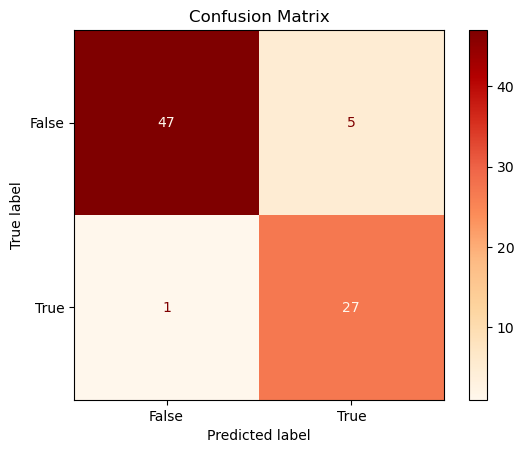

In [184]:
accuracy = accuracy_score(Y_test, y_test_predict_gini)
print("Accuracy score on using Decision Trees: ", accuracy)

# Create confusion matrix
cm1 = confusion_matrix(Y_test, y_test_predict_gini)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = [False, True])
cm_display.plot(cmap='OrRd')
plt.title('Confusion Matrix')
plt.show()


In [103]:
clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 4, min_samples_leaf = 5)

In [104]:
clf_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       random_state=100)

In [105]:
y_test_predict_entropy = clf_entropy.predict(X_test)

Accuracy score:  0.9375


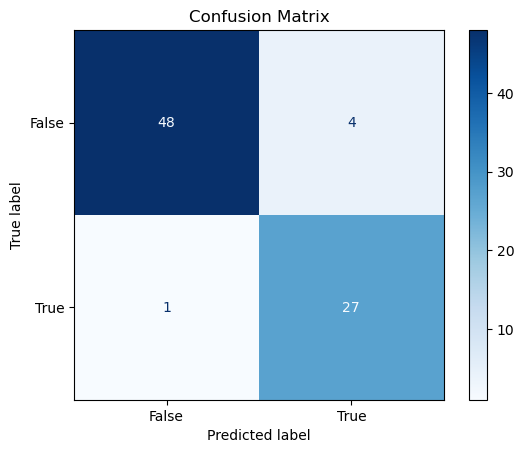

In [185]:
print('Accuracy score: ',accuracy_score(Y_test,y_test_predict_entropy))
cm2 = confusion_matrix(Y_test,y_test_predict_entropy)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels = [False, True])
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [202]:
# Plot ROC curve
from sklearn.metrics import roc_curve

thresholds = roc_curve(Y_test,y_test_predict_entropy, pos_label = '>50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

/Users/aryankamani/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:751: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  y_true = y_true == pos_label


TypeError: 'bool' object is not subscriptable